# OpenCVÎ•º ÌôúÏö©Ìïú Í∞úÏ≤¥ ÌÉêÏßÄ ÌõÑ ÏÉâ Í∑∏Î£πÌôî
  -> Í∞úÏ≤¥ ÌÉêÏßÄ ÌõÑ ÏÉâ Ï∂îÏ∂úÌïòÏó¨ Í∑∏Î£πÌôî

## Í∞úÏ≤¥ ÌÉêÏßÄ

Î™®Îìà import

In [1]:
import cv2
import numpy as np

In [2]:
print(cv2.__version__)

4.11.0


In [3]:
def grabcut_segmentation(image_path):
    # Ïù¥ÎØ∏ÏßÄ Î°úÎìú
    img = cv2.imread(image_path)
    if img is None:
        print("Ïù¥ÎØ∏ÏßÄÎ•º Î∂àÎü¨Ïò¨ Ïàò ÏóÜÏäµÎãàÎã§.")
        return
    
    # Ï∞ΩÏùò Ï¢ÖÎ£å Î≤ÑÌäº ÌôúÏÑ±Ìôî
    cv2.namedWindow("Original Image with Contours", cv2.WINDOW_NORMAL)
    cv2.setWindowProperty("Original Image with Contours", cv2.WND_PROP_TOPMOST, 1)
    cv2.namedWindow("Segmented Object", cv2.WINDOW_NORMAL)
    cv2.setWindowProperty("Segmented Object", cv2.WND_PROP_TOPMOST, 1)
    
    # ÎßàÏä§ÌÅ¨ Ï¥àÍ∏∞Ìôî
    mask = np.zeros(img.shape[:2], np.uint8)
    
    # GrabCutÏùÑ ÏúÑÌïú ÏûÑÏãú Î∞∞Ïó¥ ÏÉùÏÑ±
    bgdModel = np.zeros((1, 65), np.float64)
    fgdModel = np.zeros((1, 65), np.float64)
    
    # Í¥ÄÏã¨ ÏòÅÏó≠(ROI) ÏÑ§Ï†ï (Ïù¥ÎØ∏ÏßÄ Ï§ëÏïô Í∏∞Ï§Ä)
    height, width = img.shape[:2]
    rect = (int(width*0.1), int(height*0.1), int(width*0.8), int(height*0.8))  # (x, y, w, h)
    
    # GrabCut Ïã§Ìñâ
    cv2.grabCut(img, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)
    
    # Î∞∞Í≤Ω Ï†úÍ±∞ÌïòÏó¨ Í∞ùÏ≤¥Îßå ÎÇ®Í∏∞Í∏∞
    mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
    segmented = img * mask2[:, :, np.newaxis]
    
    # Í≤ΩÍ≥Ñ Í≤ÄÏ∂ú
    contours, _ = cv2.findContours(mask2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄÏóê Í≤ΩÍ≥ÑÏÑ†ÏùÑ Í∑∏Î¶º (Ï¥àÎ°ùÏÉâ, ÎëêÍªò 2)
    cv2.drawContours(img, contours, -1, (0, 255, 0), 2)
    
    # Í≤∞Í≥º Ï∂úÎ†•
    cv2.imshow("Original Image with Contours", img)
    cv2.imshow("Segmented Object", segmented)
    
    print("Ï∞ΩÏùÑ Îã´ÏúºÎ†§Î©¥ 'q' ÌÇ§ ÎòêÎäî ESC ÌÇ§Î•º ÎàÑÎ•¥ÏÑ∏Ïöî.")
    
    while True:
        key = cv2.waitKey(1) & 0xFF
        if key == 27:  # ESC ÌÇ§ ÏûÖÎ†• Ïãú Îã´Í∏∞
            cv2.destroyAllWindows()
            break
        
        # Ï∞ΩÏù¥ Îã´ÌòîÎäîÏßÄ ÌôïÏù∏ ÌõÑ Ï¢ÖÎ£å
        if cv2.getWindowProperty("Original Image with Contours", cv2.WND_PROP_VISIBLE) < 1 or \
           cv2.getWindowProperty("Segmented Object", cv2.WND_PROP_VISIBLE) < 1:
            cv2.destroyAllWindows()
            break
    
    # ÎÇ®ÏïÑÏûàÎäî Î™®Îì† Ïù¥Î≤§Ìä∏ Ï≤òÎ¶¨ ÌõÑ Ï∞Ω Îã´Í∏∞
    cv2.waitKey(1)
    cv2.destroyAllWindows()
    cv2.waitKey(1)
    cv2.waitKey(1)
    cv2.waitKey(1)
    cv2.waitKey(1)

# Ïã§Ìñâ ÏòàÏãú (Ïù¥ÎØ∏ÏßÄ Í≤ΩÎ°úÎ•º ÏûÖÎ†•ÌïòÏó¨ ÌÖåÏä§Ìä∏)
grabcut_segmentation("data/musinsa_images_outer/O66.jpg")


Ï∞ΩÏùÑ Îã´ÏúºÎ†§Î©¥ 'q' ÌÇ§ ÎòêÎäî ESC ÌÇ§Î•º ÎàÑÎ•¥ÏÑ∏Ïöî.


## APIÎ°ú Ïù¥ÎØ∏ÏßÄ Î∂àÎü¨Ïò§Í∏∞

### ÎùºÏù¥Î∏åÎü¨Î¶¨ import

In [4]:
import requests
import json
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
from collections import defaultdict

### Azure Custom Vision API Ï†ïÎ≥¥ (ÏÇ¨Ïö©ÏûêÍ∞Ä ÏßÅÏ†ë ÏûÖÎ†•)

In [ ]:
# Azure Custom Vision API Ï†ïÎ≥¥ (ÏÇ¨Ïö©ÏûêÍ∞Ä ÏßÅÏ†ë ÏûÖÎ†•)


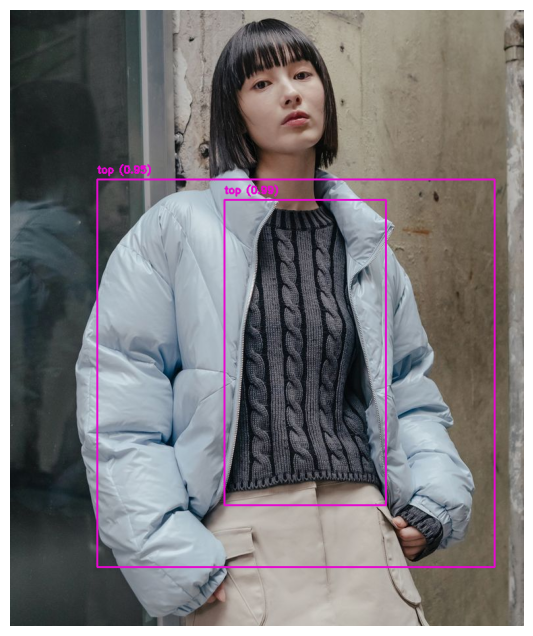

In [13]:
# ÏûÑÍ≥ÑÍ∞í ÏÑ§Ï†ï
THRESHOLD = 0.7  # 70% Ïù¥ÏÉÅ ÌôïÎ•†Îßå ÌëúÏãú

# Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ ÏÉâÏÉÅ Ï†ÄÏû•Ïö© ÎîïÏÖîÎÑàÎ¶¨
category_colors = defaultdict(lambda: (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255)))

def detect_objects(image_path):
    # Ïù¥ÎØ∏ÏßÄ Î°úÎìú
    with open(image_path, "rb") as image_file:
        image_data = image_file.read()

    # API ÏöîÏ≤≠ Ìó§Îçî Î∞è Îç∞Ïù¥ÌÑ∞
    headers = {
        "Prediction-Key": prediction_key,
        "Content-Type": "application/octet-stream"
    }
    url = f"{prediction_endpoint}/customvision/v3.0/Prediction/{project_id}/detect/iterations/{model_name}/image"
    
    # ÏöîÏ≤≠ Ï†ÑÏÜ°
    response = requests.post(url, headers=headers, data=image_data)
    
    if response.status_code != 200:
        print("Error:", response.text)
        return None

    # JSON ÏùëÎãµ Îç∞Ïù¥ÌÑ∞ ÌååÏã±
    return response.json()

def visualize_detections(image_path, detections):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    for prediction in detections["predictions"]:
        probability = prediction["probability"]
        if probability < THRESHOLD:
            continue  # ÏûÑÍ≥ÑÍ∞íÎ≥¥Îã§ ÎÇÆÏúºÎ©¥ Î¨¥Ïãú

        tag_name = prediction["tagName"]
        bbox = prediction["boundingBox"]

        # Î∞îÏö¥Îî© Î∞ïÏä§ Ï†ïÎ≥¥ Î≥ÄÌôò
        h, w, _ = image.shape
        x1, y1 = int(bbox["left"] * w), int(bbox["top"] * h)
        x2, y2 = int((bbox["left"] + bbox["width"]) * w), int((bbox["top"] + bbox["height"]) * h)

        # Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ ÏÉâÏÉÅ ÏÑ†ÌÉù
        color = category_colors[tag_name]

        # Î∞îÏö¥Îî© Î∞ïÏä§ Î∞è ÌÖçÏä§Ìä∏ Ï∂îÍ∞Ä
        cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)
        cv2.putText(image, f"{tag_name} ({probability:.2f})", (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

    # Í≤∞Í≥º ÏãúÍ∞ÅÌôî
    plt.figure(figsize=(10, 8))
    plt.imshow(image)
    plt.axis("off")
    plt.show()

# Ïã§Ìñâ ÏòàÏãú
image_file = "data/musinsa_images_outer/O1968.jpg"
detections = detect_objects(image_file)
if detections:
    visualize_detections(image_file, detections)


### ÌÉêÏßÄÌïú Í∞ùÏ≤¥ Î∂ÄÎ∂ÑÎßå ÏûòÎùºÏò§Í∏∞

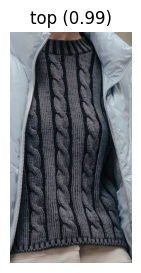

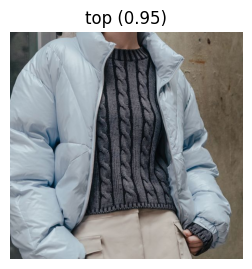

Tag: top, Probability: 0.99, Image Shape: (464, 245, 3)
Tag: top, Probability: 0.95, Image Shape: (589, 603, 3)


In [14]:
import cv2
import matplotlib.pyplot as plt

def show_cropped_objects_clean(image_path, detections, threshold=THRESHOLD):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    cropped_images = []  # ÌÅ¨Î°≠Îêú Ïù¥ÎØ∏ÏßÄÎ•º Ï†ÄÏû•Ìï† Î¶¨Ïä§Ìä∏

    for prediction in detections["predictions"]:
        probability = prediction["probability"]
        if probability < threshold:
            continue  # ÏûÑÍ≥ÑÍ∞íÎ≥¥Îã§ ÎÇÆÏúºÎ©¥ Î¨¥Ïãú

        tag_name = prediction["tagName"]
        bbox = prediction["boundingBox"]

        # Î∞îÏö¥Îî© Î∞ïÏä§ Ï¢åÌëú Î≥ÄÌôò
        h, w, _ = image.shape
        x1, y1 = int(bbox["left"] * w), int(bbox["top"] * h)
        x2, y2 = int((bbox["left"] + bbox["width"]) * w), int((bbox["top"] + bbox["height"]) * h)

        # Í∞ùÏ≤¥ Î∂ÄÎ∂Ñ ÏûòÎùºÎÇ¥Í∏∞
        cropped_object = image[y1:y2, x1:x2]
        cropped_images.append((tag_name, probability, cropped_object))  # (ÎùºÎ≤®, ÌôïÎ•†, Ïù¥ÎØ∏ÏßÄ) Ï†ÄÏû•

        # ÏÉà Ï∞ΩÏóê Í∞úÎ≥Ñ Ïù¥ÎØ∏ÏßÄ Ï∂úÎ†•
        plt.figure(figsize=(3, 3))
        plt.imshow(cropped_object)
        plt.title(f"{tag_name} ({probability:.2f})")
        plt.axis("off")
        plt.show()

    return cropped_images  # ÌÅ¨Î°≠Îêú Ïù¥ÎØ∏ÏßÄ Î¶¨Ïä§Ìä∏ Î∞òÌôò

# Ïã§Ìñâ ÏòàÏãú
cropped_objects = show_cropped_objects_clean(image_file, detections)

# Î∞òÌôòÎêú Ïù¥ÎØ∏ÏßÄ ÌôïÏù∏
for tag, prob, img in cropped_objects:
    print(f"Tag: {tag}, Probability: {prob:.2f}, Image Shape: {img.shape}")


### ÌÖåÎëêÎ¶¨ Ï∂îÏ∂ú Î∞è ÌÅ¨Î°≠

ÏûÑÏãúÎ°ú Í∞ÄÏû• ÏÑ±Í≥µÌïú ÏΩîÎìú

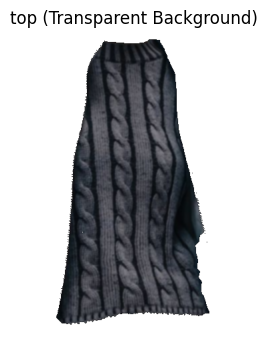

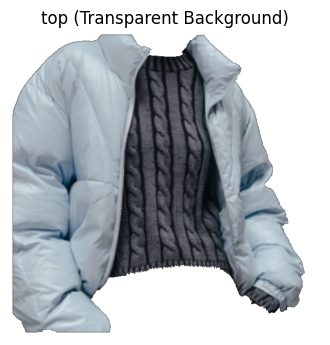

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def remove_background(cropped_images):
    final_images = []  # ÏµúÏ¢Ö Í≤∞Í≥º Ï†ÄÏû•

    for tag, prob, img in cropped_images:
        h, w, _ = img.shape
        
        # Ï¥àÍ∏∞ ÎßàÏä§ÌÅ¨ ÏÑ§Ï†ï
        mask = np.zeros((h, w), np.uint8)
        bgd_model = np.zeros((1, 65), np.float64)
        fgd_model = np.zeros((1, 65), np.float64)
        
        # GrabCutÏùÑ ÏúÑÌïú Ï¥àÍ∏∞ ÏÇ¨Í∞ÅÌòï (Ï°∞Í∏à ÏûëÍ≤å ÏÑ§Ï†ï)
        rect = (5, 5, w-10, h-10)
        cv2.grabCut(img, mask, rect, bgd_model, fgd_model, 5, cv2.GC_INIT_WITH_RECT)
        
        # Î∞∞Í≤ΩÍ≥º Ï†ÑÍ≤Ω Î∂ÑÎ¶¨
        mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype("uint8")
        result = img * mask2[:, :, np.newaxis]
        
        # Í≤ΩÍ≥Ñ Î∂ÄÎìúÎüΩÍ≤å (Í∞ÄÏö∞ÏãúÏïà Î∏îÎü¨ Ï†ÅÏö©)
        blurred = cv2.GaussianBlur(result, (5, 5), 0)

        # ÏïåÌåå Ï±ÑÎÑê Ï∂îÍ∞Ä
        alpha = mask2 * 255
        rgba = np.dstack([blurred, alpha])

        # üìå ÏµúÏ¢Ö Ïù¥ÎØ∏ÏßÄ Ï∂úÎ†•
        plt.figure(figsize=(4, 4))
        plt.imshow(rgba)
        plt.title(f"{tag} (Transparent Background)", fontsize=12)
        plt.axis("off")
        plt.show()

        final_images.append((tag, rgba))  # Í≤∞Í≥º Ï†ÄÏû•
    
    return final_images  # ÏµúÏ¢Ö Ïù¥ÎØ∏ÏßÄ Î∞òÌôò

# üî• Ïã§Ìñâ
final_results = remove_background(cropped_objects)


